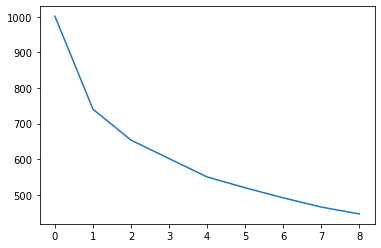

[[ 5.32752992e+02  5.20555895e+02  1.01500637e+01  9.81194296e+00
   9.74425770e+00  1.51201935e+00  5.75811052e+01  2.64790985e+00
   1.23382480e-01  2.25790171e+00  3.28423733e+01  1.47369493e-01
   6.60631525e-01  9.87012987e+00  3.26671760e+00  3.33430863e+00
   4.42225618e+01  1.24120194e+01  1.04157117e+00  2.11415839e+01
   1.23160428e+02  2.42285714e+02  9.53557423e+00  1.68807487e+02
   1.28703591e+00]
 [ 1.00000000e+02  1.00000000e+02  1.25555556e+00  2.50000000e+00
   2.50000000e+00  0.00000000e+00  4.44444444e-01  1.44444444e-02
   1.55555556e-02  3.44444444e-01  1.55555556e+00  3.44444444e-02
   1.11022302e-16 -1.77635684e-15  4.11111111e-01  4.11111111e-01
   3.43333333e+01  7.90555556e+02  2.77777778e-01  3.55555556e+00
   2.45555556e+01  7.56666667e+01  2.58888889e+00  3.34390000e+04
   1.22222222e-01]
 [ 6.69600000e+02  6.69600000e+02  2.06500000e+01  1.81000000e+00
   1.81000000e+00  0.00000000e+00  1.99399000e+04  2.00700000e-01
   3.02900000e+00  9.58500000e+00  8.1

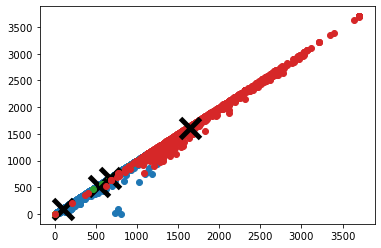

In [1]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm
from matplotlib import pyplot
from sklearn.cluster import KMeans
from scipy import cluster
from sklearn.model_selection import train_test_split

dataNutrition = pd.read_csv('Nutrition Dataset.csv',usecols=["FoodName","GyclemicIndex","Energywithdietaryfibre(kJ)",
															"Energywithoutdietaryfibre(kJ)", "Protein(g)", 
                                                             "Availablecarbohydrateswithsugaralcohols(g)",
                                                             "Availablecarbohydrateswithoutsugaralcohol(g)",
                                                             "Dietaryfibre(g)", "VitaminAretinolequivalents(g)","Thiamin(B1)(mg)",
															 "Riboflavin(B2)(mg)", "Niacin(B3)(mg)", "Dietaryfolateequivalents(g)",
															 "VitaminB6(mg)", "VitaminB12(g)", "VitaminC(mg)", 
															 "Alpha-tocopherol(mg)", "VitaminE(mg)", "Calcium(Ca)(mg)",
															 "Iodine(I)(g)",	"Iron(Fe)(mg)", "Magnesium(Mg)(mg)", "Phosphorus(P)(mg)",
															 "Potassium(K)(mg)", "Selenium(Se)(g)", "Sodium(Na)(mg)", "Zinc(Zn)(mg)"])
dataNutrition = dataNutrition[dataNutrition["GyclemicIndex"].notnull()]
diabetes_X = dataNutrition.drop('GyclemicIndex', 1)
diabetes_X = diabetes_X.drop('FoodName', 1)
X = np.array(diabetes_X)
diabetes_Y = dataNutrition["GyclemicIndex"]
'''data_train, data_test = train_test_split(diabetes_X, test_size=.2)'''


cluster_array = [cluster.vq.kmeans(diabetes_X, i) for i in range(1,10)]

plt.plot([var for (cent,var) in cluster_array])
plt.show()

'''model = KMeans(n_clusters=2)
model.fit(data_train)
clusassign =model.predict(data_test)
print (clusassign)

print (sm.accuracy_score(diabetes_Y, data_test))
print (sm.confusion_matrix(diabetes_Y, data_test))'''

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroid = kmeans.cluster_centers_
labels = kmeans.labels_
print (centroid)
print(labels)

for i in range(4):
    ds = X[np.where(labels==i)]
    pyplot.plot(ds[:,0],ds[:,1],'o')
    lines = pyplot.plot(centroid[i,0],centroid[i,1],'kx')
    pyplot.setp(lines,ms=20.0)
    pyplot.setp(lines,mew=5.0)
pyplot.show()

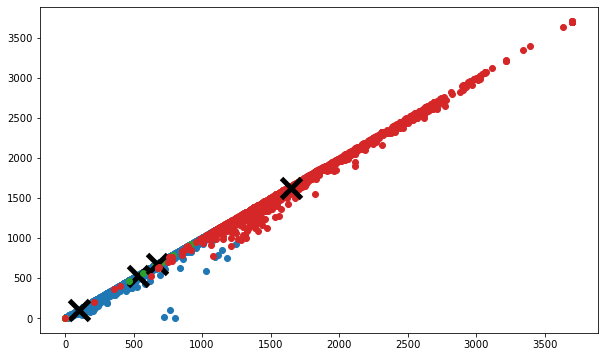

In [2]:
plt.figure(figsize=(10, 6))
for i in range(4):
    ds = X[np.where(labels==i)]
    pyplot.plot(ds[:,0],ds[:,1],'o')
    lines = pyplot.plot(centroid[i,0],centroid[i,1],'kx')
    pyplot.setp(lines,ms=20.0)
    pyplot.setp(lines,mew=5.0)
pyplot.show()

In [3]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)

for label, count in zip(unique, counts):
    print(f'Cluster {label}: {count} data points')


Cluster 0: 3929 data points
Cluster 1: 9 data points
Cluster 2: 10 data points
Cluster 3: 1792 data points
